In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_dir = ("D:\\xray_dataset_covid19\\train")
test_dir = ("D:\\xray_dataset_covid19\\test")
classes_train =os.listdir(train_dir)
classes_test =os.listdir(test_dir)
classes_train

['COVID', 'NORMAL']

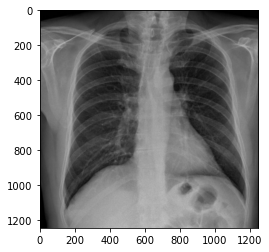

In [3]:
plt.imshow(cv2.imread("D:/xray_dataset_covid19/train/COVID/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg"))

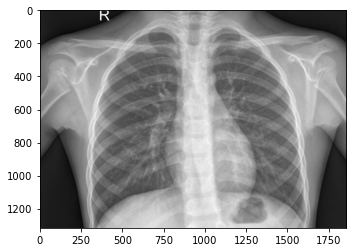

In [4]:
plt.imshow(cv2.imread("D:/xray_dataset_covid19/train/NORMAL/IM-0001-0001.jpeg"))

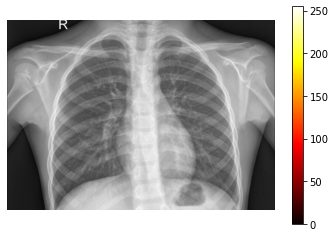

In [5]:
plt.imshow(cv2.imread("D:/xray_dataset_covid19/train/NORMAL/IM-0001-0001.jpeg"), cmap='hot')
plt.axis('off')
plt.colorbar()

In [6]:
# Define augmentation
train_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(train_dir,class_mode='binary',color_mode='rgb',batch_size= 16,target_size=(1000,1000,3)[:2])

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator=test_datagen.flow_from_directory(test_dir,class_mode='binary',color_mode='rgb',batch_size=16,target_size=(1000,1000,3)[:2])

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [8]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)
callbacks = [earlystop, learning_rate_reduction]

In [3]:
model=Sequential() 

model.add(Conv2D(32,(2,2),activation='relu',input_shape=(1000,1000,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(1,activation='tanh'))

model.compile(optimizer='adam' ,loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 999, 999, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 499, 499, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 498, 498, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 166, 166, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 164, 164, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 64)       0

In [5]:
model.fit(
    train_generator, 
    epochs=14,
    validation_data=test_generator
)


NameError: name 'train_generator' is not defined

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
#Printing the accuracy value
print("Accuracy Test -  ", model.evaluate(test_generator)[1]*100, '%')

In [ ]:
real = test_generator.classes
real

In [ ]:
con = confusion_matrix(real, predictions)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real, predictions ))

In [ ]:
predict_path='D:/xray_dataset_covid19/train/COVID/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg'
my_image = image.load_img(predict_path,target_size=(1000,1000,3))

In [ ]:
my_image = np.expand_dims(my_image,axis = 0)


In [ ]:
np.argmax(model.predict(my_image))

In [ ]:
predict_path='D:\\xray_dataset_covid19\\train\\COVID\\doo.jpeg'

In [ ]:
my_image = image.load_img(predict_path)

In [ ]:
my_image

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

In [ ]:
pip install idx2numpy

In [ ]:
from PIL import Image
import os
import PIL
import glob
import idx2numpy
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import cv2

image = cv2.imread("D:\\xray_dataset_covid19\\train\\COVID\\doo.jpeg")

# converting BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imshow('image', image_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()